In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv("../data/logfile-storage-v5.csv", delimiter=";")
dataset.head()

,datacenter_id,datacenter_name,datacenter_storage_energy,storage_id,system,storage_capacity,capacity_used,active_duration,idle_intervals,duration,total_energy_active,total_energy_idle,average_rotation_latency,average_seek_Time,max_internal_data_transfer_rate,is_active,idle_power,active_power,files,Unnamed: 19
0,3,Datacenter_1,4.099681e+06,0,storage,900000.0,899584.0,4635.372761,1.0000003378537212:,9447.595287,26885.162012,3.000001,0.003,0.004,198.0,False,3.0,5.8,"55596,3072,15.524809784082704:450990,1024,5.18...",NaN
1,3,Datacenter_1,4.099681e+06,1,storage,900000.0,899584.0,4552.153376,1.0000000057506384:,9447.595287,26402.489581,3.000000,0.003,0.004,198.0,False,3.0,5.8,"1002363,1024,5.178738666087011:287333,512,2.59...",NaN
2,3,Datacenter_1,4.099681e+06,2,storage,900000.0,899584.0,4712.463046,1.0000000137015315:,9447.595287,27332.285668,3.000000,0.003,0.004,198.0,False,3.0,5.8,"3-6852,8192,41.38862101694565:24-285602,512,2....",NaN
3,3,Datacenter_1,4.099681e+06,3,storage,900000.0,899584.0,4924.857340,1.0000000205963306:,9447.595287,28564.172570,3.000000,0.003,0.004,198.0,False,3.0,5.8,"303602,3584,18.10363760760568:1-591519,3072,15...",NaN
4,3,Datacenter_1,4.099681e+06,4,storage,900000.0,899584.0,4813.303893,1.000000024323157:,9447.595287,27917.162579,3.000000,0.003,0.004,198.0,False,3.0,5.8,"2-878359,1024,5.1852412125875285:2-1002249,102...",NaN


## Energy Consumption

#### Maximum energy consumption of persistent storage

The datacenter 'Datacenter_1' current persistent storage infrastructure at max can consume 0.11019999999999999 Kilo Joules (kJ/s) per second.


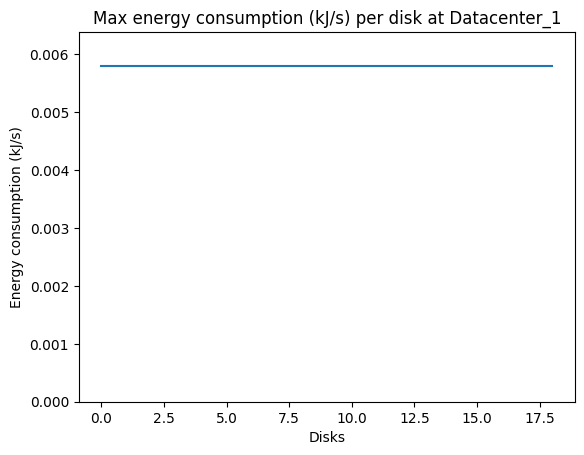

Datacenter_1's current persistent storage infrastructure can at max consume 1041.1250006461203 Kilo Joules (kJ) over the duration 9447.595287169874.


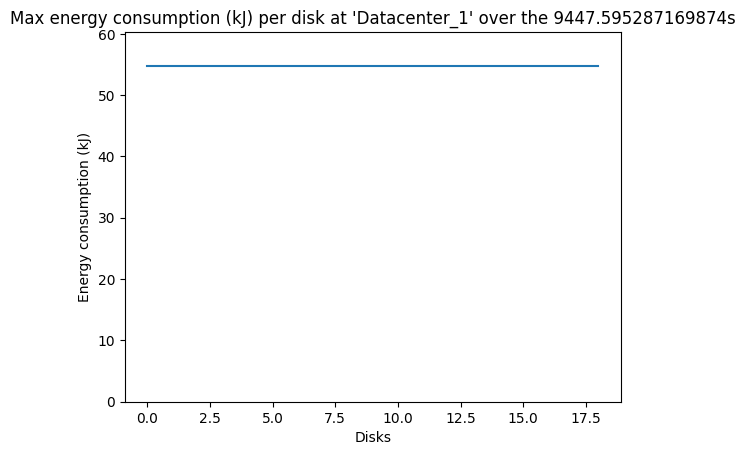

The datacenter 'Datacenter_2' current persistent storage infrastructure at max can consume 0.15778 Kilo Joules (kJ/s) per second.


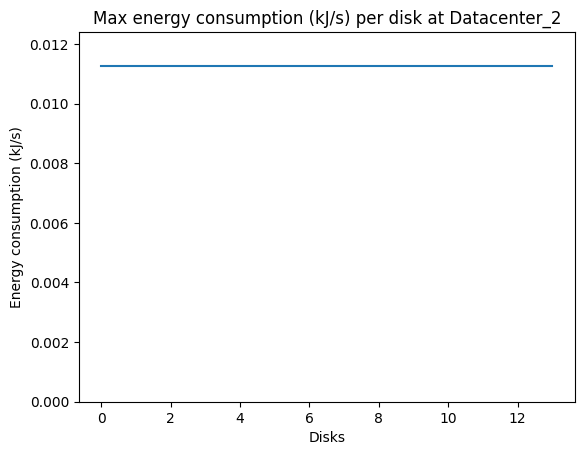

Datacenter_2's current persistent storage infrastructure can at max consume 1490.6415844096625 Kilo Joules (kJ) over the duration 9447.595287169874.


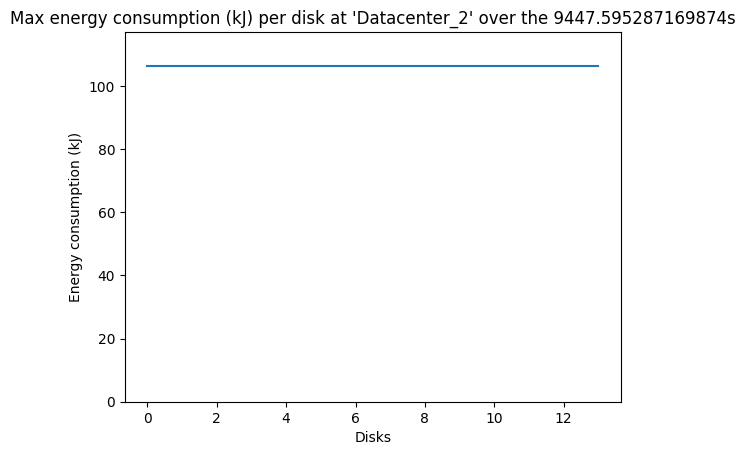

The datacenter 'Datacenter_3' current persistent storage infrastructure at max can consume 0.1582 Kilo Joules (kJ/s) per second.


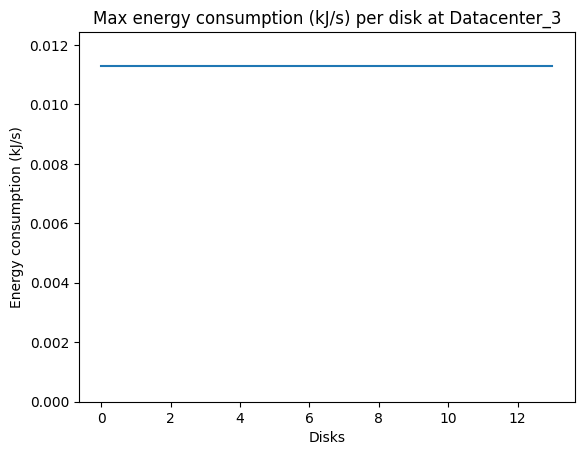

Datacenter_3's current persistent storage infrastructure can at max consume 1494.6095744302738 Kilo Joules (kJ) over the duration 9447.595287169874.


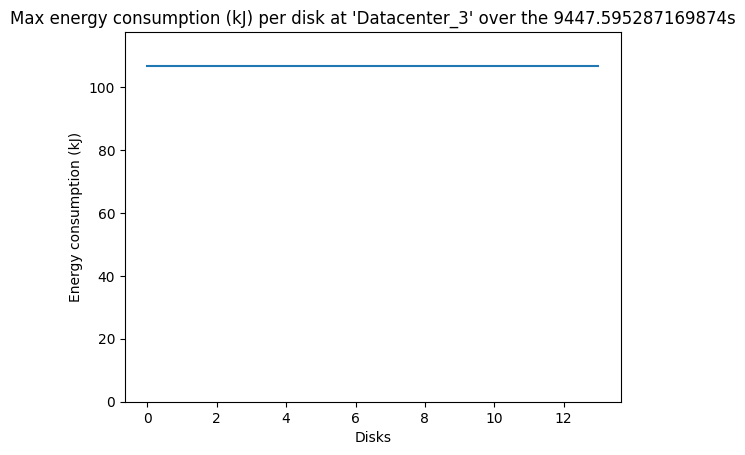

The datacenter 'Datacenter_4' current persistent storage infrastructure at max can consume 0.11954999999999999 Kilo Joules (kJ/s) per second.


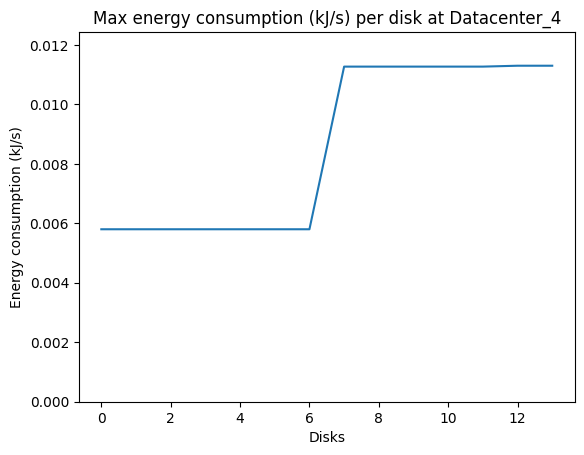

Datacenter_4's current persistent storage infrastructure can at max consume 1129.4600165811585 Kilo Joules (kJ) over the duration 9447.595287169874.


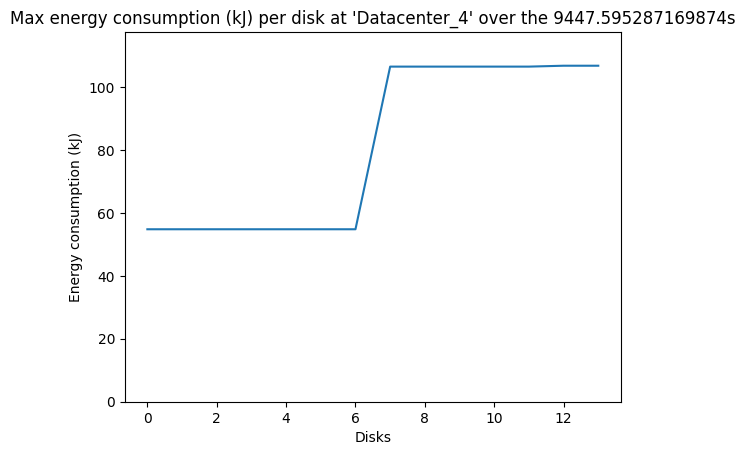

The cloud providers current computing infrastructure at max can consume 0.5457299999999998 Joules (J) per second and over a duration of 9447.595287169874 consume 48710253.55843258


In [2]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

# max_power = 0
max_power_per_disk = np.array([])

# max_power_consumed = 0
max_power_consumed_per_disk = np.array([])

max_power_per_datacenter = np.array([])
max_power_consumed_per_datacenter = np.array([])

duration_per_disk = np.array([])

datacenter_total_duration = np.array([])
datacenter_total_capacity = np.array([])
datacenter_disks = np.array([])

for i in range(len(labels)):
    # max_power_per_datacenter = 0
    max_power_per_disk_per_datacenter = np.array([])
    
    # max_power_consumed_per_datacenter = 0
    max_power_consumed_per_disk_per_datacenter = np.array([])
    
    duration_per_disk_per_datacenter = np.array([])
    
    disks = 0
    total_duration = 0
    max_capacity = 0
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        disks += 1
        
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        total_duration += float(sample['duration'])
        max_capacity += float(sample['storage_capacity'])
        active_power = float(sample['active_power'])
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        max_consumed_active_power = float(sample['active_power']) * float(sample['duration'])
        consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
        # max_power_per_datacenter += active_power
        max_power_per_disk = np.append(max_power_per_disk, active_power)
        max_power_per_disk_per_datacenter = np.append(max_power_per_disk_per_datacenter, active_power)
        max_power_consumed_per_disk = np.append(max_power_consumed_per_disk, float(sample['active_power'])*duration)
        max_power_consumed_per_disk_per_datacenter = np.append(max_power_consumed_per_disk_per_datacenter, float(sample['active_power'])*duration)
        duration_per_disk_per_datacenter = np.append(duration_per_disk_per_datacenter, sample['duration'])
    
    max_power_per_datacenter = np.append(max_power_per_datacenter, np.sum(max_power_per_disk_per_datacenter))
    max_power_consumed_per_datacenter = np.append(max_power_consumed_per_datacenter, np.sum(max_power_consumed_per_disk_per_datacenter))
    datacenter_total_capacity = np.append(datacenter_total_capacity, max_capacity)
    datacenter_total_duration = np.append(datacenter_total_duration, total_duration)
    datacenter_disks = np.append(datacenter_disks, disks)
    # max_power += np.sum(max_power_per_disk_per_datacenter)
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure at max can consume {(np.sum(max_power_per_disk_per_datacenter) * 1)/1000} Kilo Joules (kJ/s) per second.")
    plt.plot(np.arange(0, len(max_power_per_disk_per_datacenter)), ((max_power_per_disk_per_datacenter*1)/1000))
    plt.ylim((0, (max(max_power_per_disk_per_datacenter) + (max(max_power_per_disk_per_datacenter) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ/s)")
    plt.title(f"Max energy consumption (kJ/s) per disk at {labels[i]}")
    plt.show()
    
    print(f"{labels[i]}'s current persistent storage infrastructure can at max consume {(np.sum(max_power_consumed_per_disk_per_datacenter))/1000} Kilo Joules (kJ) over the duration {duration}.")
    plt.plot(np.arange(0, len(max_power_consumed_per_disk_per_datacenter)), ((max_power_consumed_per_disk_per_datacenter)/1000))
    plt.ylim((0, (max(max_power_consumed_per_disk_per_datacenter) + (max(max_power_consumed_per_disk_per_datacenter) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Max energy consumption (kJ) per disk at '{labels[i]}' over the {duration}s")
    plt.show()

print(f"The cloud providers current computing infrastructure at max can consume {(np.sum(max_power_per_disk) * 1)/1000} Joules (J) per second and over a duration of {duration} consume {(np.sum(max_power_consumed_per_disk) * duration)/1000}")

#### Current energy consumption of persistent storage

The datacenter 'Datacenter_1' current persistent storage infrastructure is consumes 0.11019999999999999 Kilo Joules (kJ) per second.
The datacenter 'Datacenter_1' current persistent storage infrastructure is consuming 790.086001887893 Kilo Joules (kJ) over the duration 9447.595287169874s.


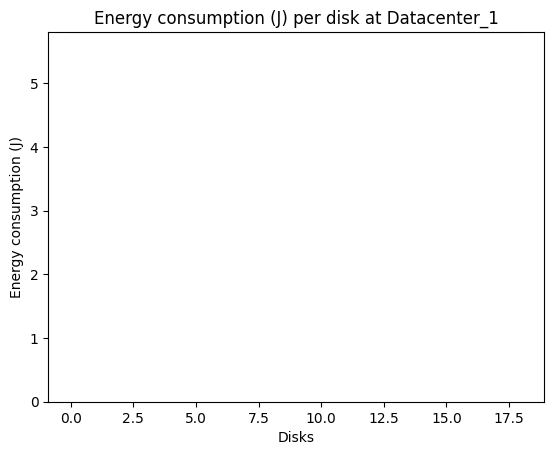

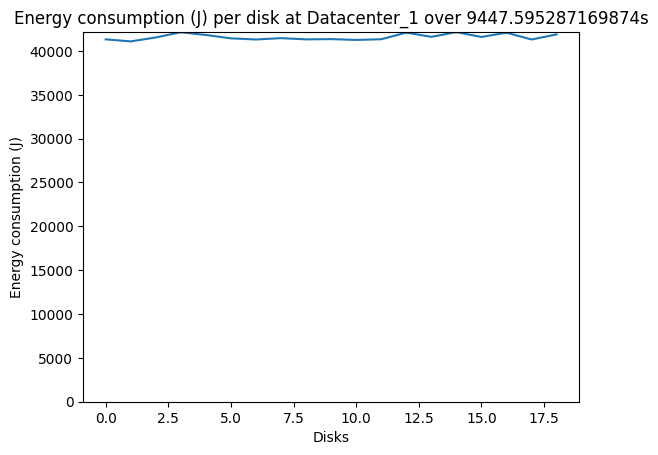

The datacenter 'Datacenter_2' current persistent storage infrastructure is consumes 0.26798 Kilo Joules (kJ) per second.
The datacenter 'Datacenter_2' current persistent storage infrastructure is consuming 1395.6595898006544 Kilo Joules (kJ) over the duration 9447.595287169874s.


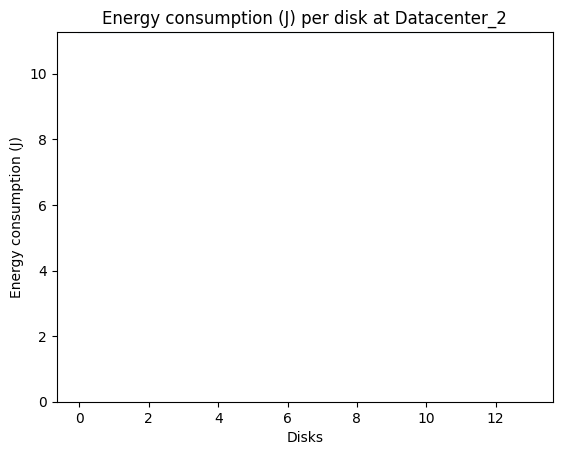

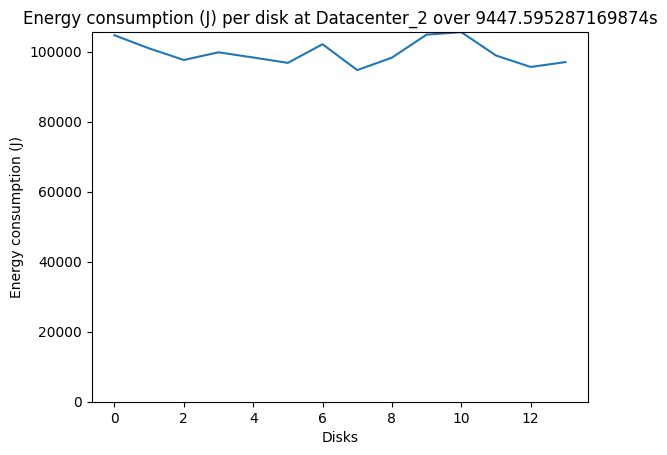

The datacenter 'Datacenter_3' current persistent storage infrastructure is consumes 0.42618000000000006 Kilo Joules (kJ) per second.
The datacenter 'Datacenter_3' current persistent storage infrastructure is consuming 1377.540181529556 Kilo Joules (kJ) over the duration 9447.595287169874s.


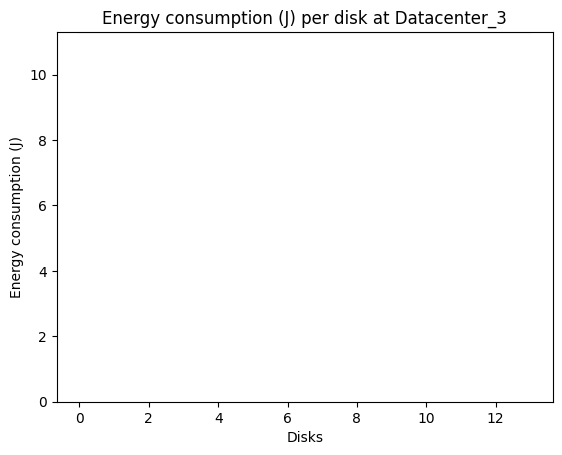

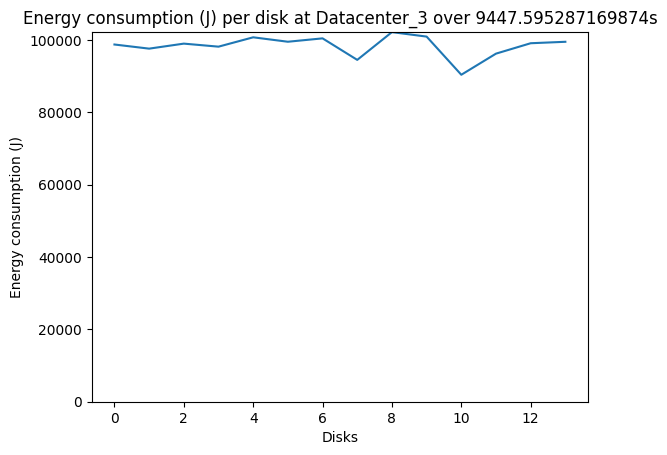

The datacenter 'Datacenter_4' current persistent storage infrastructure is consumes 0.54573 Kilo Joules (kJ) per second.
The datacenter 'Datacenter_4' current persistent storage infrastructure is consuming 992.3175621368678 Kilo Joules (kJ) over the duration 9447.595287169874s.


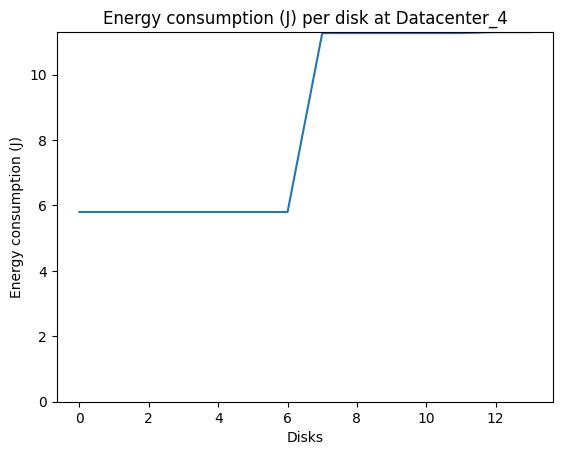

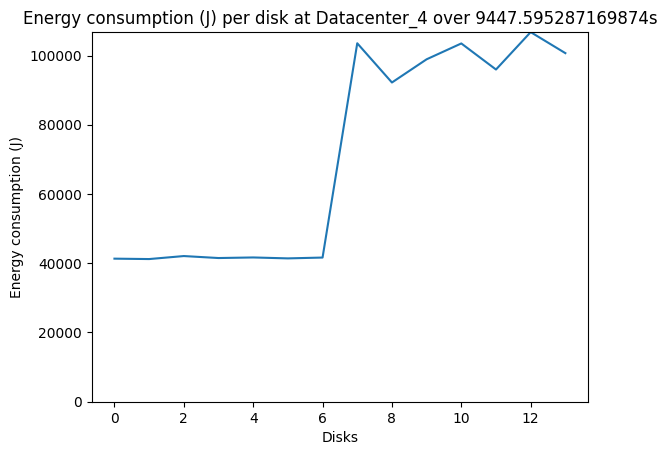

The cloud providers current storage area network consumes 0.54573 Kilo Joules (kJ) per second.
The cloud providers current storage area network is consuming 4555.603335354972 Kilo Joules (kJ) over the duration 9447.595287169874s.


In [3]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

current_power = 0
current_power_per_disk = np.array([])

current_power_consumed = 0
current_power_consumed_per_disk = np.array([])

current_power_per_datacenter = np.array([])
current_power_consumed_per_datacenter = np.array([])

datacenter_disks_on = np.array([])
datacenter_disks_idle = np.array([])

datacenter_used_capacity = np.array([])
datacenter_disks_active_duration = np.array([])
datacenter_disks_inactive_duration = np.array([])

for i in range(len(labels)):
    # current_power_per_datacenter = 0
    current_power_per_disk_per_datacenter = np.array([])
    
    # current_power_consumed_per_datacenter = 0
    current_power_consumed_per_disk_per_datacenter = np.array([])
    
    disks_on = 0
    disks_off = 0
    disks_idle = 0
    
    active_duration = 0
    inactive_duration = 0
    
    capacity_used = 0
    
    duration_per_disk_per_datacenter = np.array([])
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # idle_duration = 0
        # for idle_interval in sample['idle_intervals'].split(":"):
        #     if idle_interval != '':
        #         idle_duration += float(idle_interval)
        
        # If disk was active it is considered active and if was not at all it is considered idle
        active_duration += float(sample['active_duration'])
        inactive_duration += (float(sample['duration']) - float(sample['active_duration']))
        capacity_used += float(sample['capacity_used'])
        if sample['is_active'] == True or float(sample['active_duration']) > 0:
            disks_on += 1
            # current_power_per_datacenter += float(sample['active_power'])
            current_power_per_disk = np.append(current_power_per_disk, float(sample['active_power']))
            current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, float(sample['active_power']))
            
        else:
            disks_idle += 1
            # current_power_per_datacenter += float(sample['idle_power'])
            current_power_per_disk = np.append(current_power_per_disk, float(sample['idle_power']))
            current_power_per_disk_per_datacenter = np.append(current_power_per_disk_per_datacenter, float(sample['idle_power']))
        
        consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
        consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
        
        # current_power_consumed_per_datacenter += consumed_active_power + consumed_idle_power
        current_power_consumed_per_disk = np.append(current_power_consumed_per_disk, consumed_active_power + consumed_idle_power)
        current_power_consumed_per_disk_per_datacenter = np.append(current_power_consumed_per_disk_per_datacenter, consumed_active_power + consumed_idle_power)
        duration_per_disk = np.append(duration_per_disk, float(sample['duration']))
    current_power_per_datacenter = np.append(current_power_per_datacenter, np.sum(current_power_per_disk_per_datacenter)) 
    current_power_consumed_per_datacenter = np.append(current_power_consumed_per_datacenter, np.sum(current_power_consumed_per_disk_per_datacenter)) 
    
    datacenter_disks_on = np.append(datacenter_disks_on, disks_on) 
    datacenter_disks_idle = np.append(datacenter_disks_idle, disks_idle) 
    
    datacenter_used_capacity = np.append(datacenter_used_capacity, capacity_used)
    datacenter_disks_active_duration = np.append(datacenter_disks_active_duration, active_duration)
    datacenter_disks_inactive_duration = np.append(datacenter_disks_inactive_duration, inactive_duration)
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consumes {(np.sum(current_power_per_datacenter) * 1)/1000} Kilo Joules (kJ) per second.") # Get actual duration, get average power? or the power consumed power over the duration?
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consuming {(np.sum(current_power_consumed_per_disk_per_datacenter) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.") # Get actual duration, get average power? or the power consumed power over the duration?
    # current_power += current_power_per_datacenter
    # current_power_consumed += current_power_consumed_per_datacenter
    
    plt.plot(np.arange(0, len(current_power_per_disk_per_datacenter)), (current_power_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]}")
    plt.show()
    
    plt.plot(np.arange(0, len(current_power_consumed_per_disk_per_datacenter)), (current_power_consumed_per_disk_per_datacenter*1))
    plt.ylim((0, max(current_power_consumed_per_disk_per_datacenter)))
    plt.xlabel("Disks")
    plt.ylabel(f"Energy consumption (J)")
    plt.title(f"Energy consumption (J) per disk at {labels[i]} over {duration}s")
    plt.show()

print(f"The cloud providers current storage area network consumes {(np.sum(current_power_per_datacenter) * 1)/1000} Kilo Joules (kJ) per second.") # Get actual duration, get average power? or the power consumed power over the duration?
print(f"The cloud providers current storage area network is consuming {(np.sum(current_power_consumed_per_datacenter) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.") # Get actual duration, get average power? or the power consumed power over the duration?

#### Minimum energy consumption of persistent storage

Reducing the number of disks powered on

The datacenter 'Datacenter_1' current persistent storage infrastructure consumes 0.11019999999999999 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_1' current persistent storage infrastructure is consuming 521.1156460755069 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The datacenter could also have 0 disks powered off.
The datacenter 'Datacenter_1' current persistent storage infrastructure state is consuming 0.11019999999999999 Kilo Joules (kJ/s) per second.


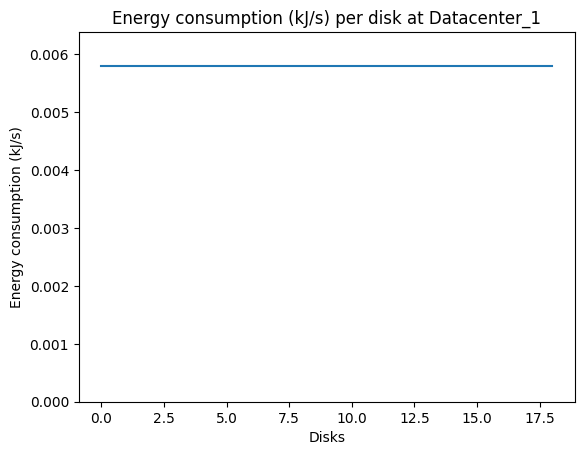

Datacenter_1's current persistent storage infrastructure has consumed 521.1156460755069 Kilo Joules (kJ) over the duration 9447.595287169874.


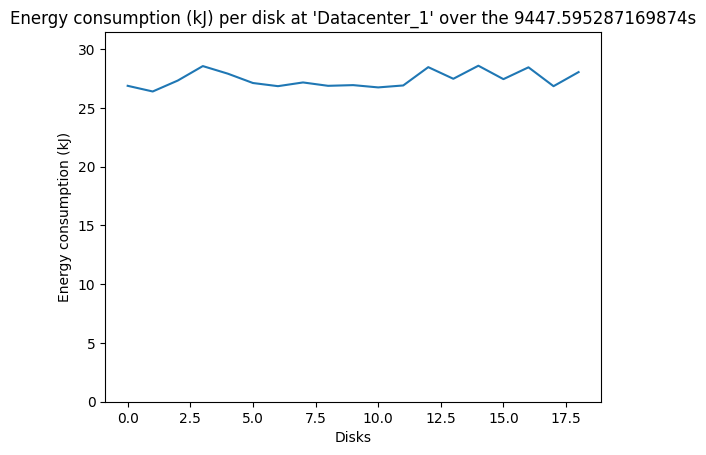

The datacenter 'Datacenter_2' current persistent storage infrastructure consumes 0.15778 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_2' current persistent storage infrastructure is consuming 1245.688019365378 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The datacenter could also have 0 disks powered off.
The datacenter 'Datacenter_2' current persistent storage infrastructure state is consuming 0.15778 Kilo Joules (kJ/s) per second.


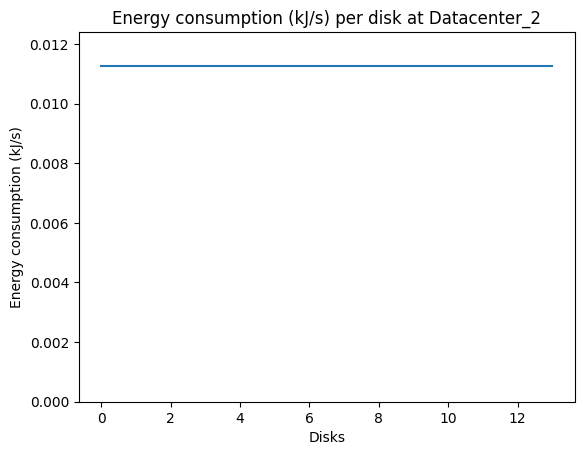

Datacenter_2's current persistent storage infrastructure has consumed 1245.688019365378 Kilo Joules (kJ) over the duration 9447.595287169874.


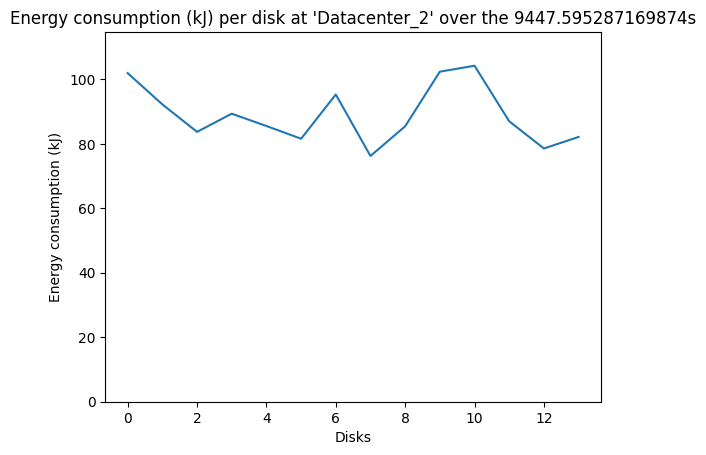

The datacenter 'Datacenter_3' current persistent storage infrastructure consumes 0.1582 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_3' current persistent storage infrastructure is consuming 1235.2205274149585 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The datacenter could also have 0 disks powered off.
The datacenter 'Datacenter_3' current persistent storage infrastructure state is consuming 0.1582 Kilo Joules (kJ/s) per second.


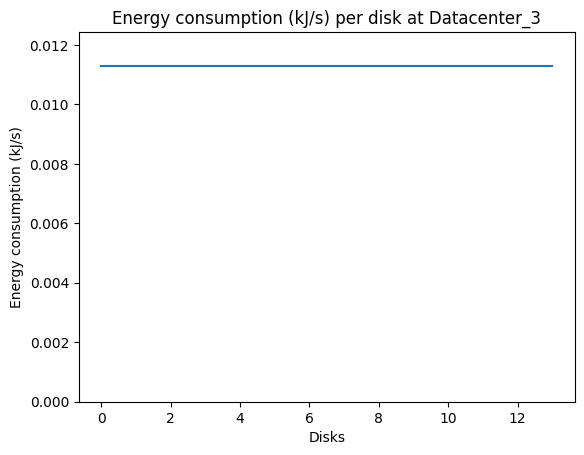

Datacenter_3's current persistent storage infrastructure has consumed 1235.2205274149585 Kilo Joules (kJ) over the duration 9447.595287169874.


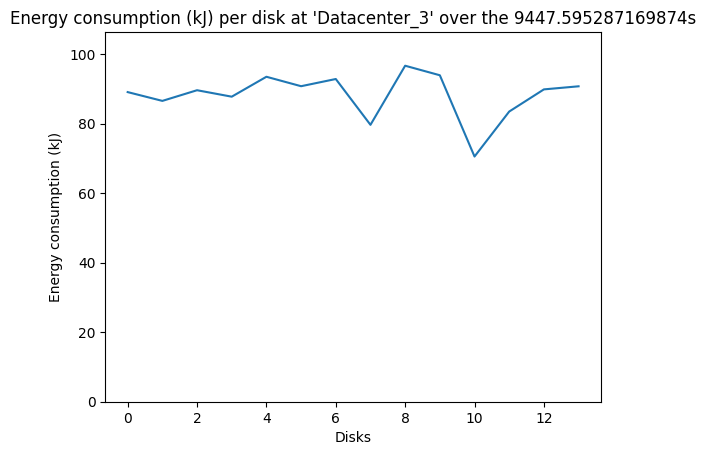

The datacenter 'Datacenter_4' current persistent storage infrastructure consumes 0.11954999999999999 Kilo Joules (kJ).
 The datacenter could also have 0 disks powered off.

The datacenter 'Datacenter_4' current persistent storage infrastructure is consuming 825.0639147702668 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The datacenter could also have 0 disks powered off.
The datacenter 'Datacenter_4' current persistent storage infrastructure state is consuming 0.11954999999999999 Kilo Joules (kJ/s) per second.


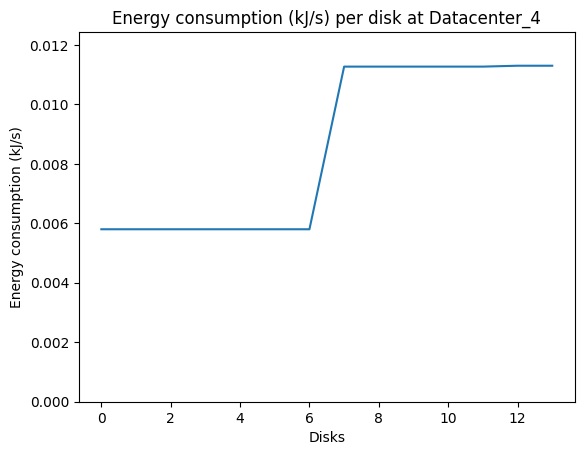

Datacenter_4's current persistent storage infrastructure has consumed 825.0639147702668 Kilo Joules (kJ) over the duration 9447.595287169874.


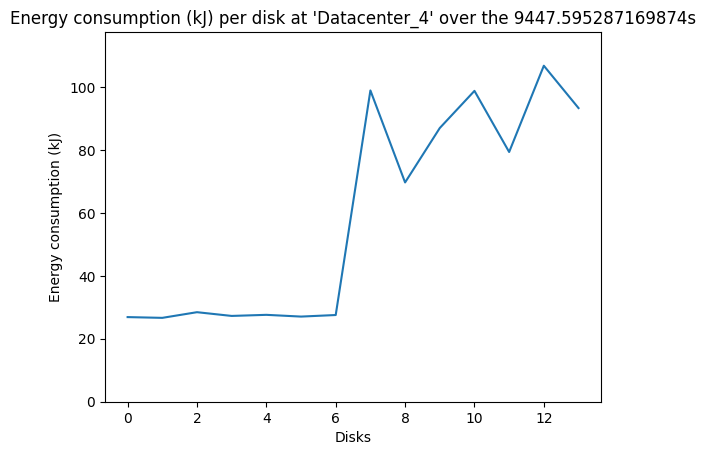

The cloud providers current storage area network consumes 0.54573 Kilo Joules (kJ).
 The cloud provider could also have 0.0 disks powered off.

The cloud providers current storage area network is consuming 3827.0881076261103 Kilo Joules (kJ) over the duration 9447.595287169874s.
 The cloud provider could also have 0.0 disks powered off.


In [4]:
labels = np.unique(dataset['datacenter_name'])


cloud_provider_power_per_disk_power_down_disks = np.array([])
cloud_provider_power_per_disk_consumed_power_down_disks = np.array([])
datacenter_power_per_disk_power_down_disks = np.array([])
datacenter_power_per_disk_consumed_power_down_disks = np.array([])

datacenter_power_down_disks_on = np.array([])
# Powering down idle and unused disks
datacenter_power_down_disks_off = np.array([])

datacenter_power_down_disks_used_capacity = np.array([])
datacenter_power_down_disks_used_or_unavailable_capacity = np.array([])
datacenter_power_down_disks_active_duration = np.array([])
datacenter_power_down_disks_inactive_duration = np.array([])

duration = dataset['duration'][0]
disks_powered_off = 0
for i in range(len(labels)):
    
    power_per_disk_per_datacenter_powered_down_disks = np.array([])
    power_consumed_per_disk_per_datacenter_powered_down_disks = np.array([])
    
    
    disks_on = 0
    disks_off = 0
    
    capacity_used = 0
    capacity_used_or_unavailable = 0
    active_duration = 0
    inactive_duration = 0
    for _, sample in dataset[dataset['datacenter_name'] == labels[i]].iterrows():
        
        # If capacity used is 0, the disk is powered off
        consumed_active_power = 0
        consumed_idle_power = 0
        disk_state_power = 0
        if sample['capacity_used'] != 0:
            consumed_active_power = float(sample['active_duration']) * float(sample['active_power'])
            consumed_idle_power = (float(sample['duration']) - float(sample['active_duration'])) * float(sample['idle_power'])
            
            active_duration += float(sample['active_duration'])
            inactive_duration += (float(sample['duration']) - float(sample['active_duration']))
            capacity_used += sample['capacity_used']
            capacity_used_or_unavailable += sample['capacity_used']
            if sample['is_active'] == True or float(sample['active_duration']) > 0:
                disk_state_power = float(sample['active_power'])
                disks_on += 1
            else: # Powering down unused disks
                disk_state_power = 0
                disks_off += 1
        else: # Powering down a disks that has no data
            inactive_duration += float(sample['duration'])
            capacity_used_or_unavailable += sample['storage_capacity']
            disk_state_power = 0
            disks_off += 1
        
        # datacenter_power_per_disk_power_down_disks += current_disk_power
        cloud_provider_power_per_disk_power_down_disks = np.append(cloud_provider_power_per_disk_power_down_disks, disk_state_power)
        power_per_disk_per_datacenter_powered_down_disks = np.append(power_per_disk_per_datacenter_powered_down_disks, disk_state_power)
        
        # datacenter_power_per_disk_consumed_power_down_disks += consumed_active_power
        cloud_provider_power_per_disk_consumed_power_down_disks = np.append(cloud_provider_power_per_disk_consumed_power_down_disks, consumed_active_power)
        power_consumed_per_disk_per_datacenter_powered_down_disks = np.append(power_consumed_per_disk_per_datacenter_powered_down_disks, consumed_active_power)
        duration_per_disk = np.append(duration_per_disk, float(sample['duration']))
    datacenter_power_per_disk_power_down_disks = np.append(datacenter_power_per_disk_power_down_disks, np.sum(power_per_disk_per_datacenter_powered_down_disks))
    datacenter_power_per_disk_consumed_power_down_disks = np.append(datacenter_power_per_disk_consumed_power_down_disks, np.sum(power_consumed_per_disk_per_datacenter_powered_down_disks))
    
    datacenter_power_down_disks_on = np.append(datacenter_power_down_disks_on, disks_on)
    datacenter_power_down_disks_off = np.append(datacenter_power_down_disks_off, disks_off)
    
    
    datacenter_power_down_disks_used_capacity = np.append(datacenter_power_down_disks_used_capacity, capacity_used)
    datacenter_power_down_disks_used_or_unavailable_capacity = np.append(datacenter_power_down_disks_used_or_unavailable_capacity, capacity_used_or_unavailable)
    datacenter_power_down_disks_active_duration = np.append(datacenter_power_down_disks_active_duration, active_duration)
    datacenter_power_down_disks_inactive_duration = np.append(datacenter_power_down_disks_inactive_duration, inactive_duration)
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure consumes {(np.sum(power_per_disk_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ).\n The datacenter could also have {disks_off} disks powered off.\n")
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure is consuming {(np.sum(power_consumed_per_disk_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.\n The datacenter could also have {disks_off} disks powered off.")
    
    print(f"The datacenter '{labels[i]}' current persistent storage infrastructure state is consuming {(np.sum(power_per_disk_per_datacenter_powered_down_disks) * 1)/1000} Kilo Joules (kJ/s) per second.")
    plt.plot(np.arange(0, len(power_per_disk_per_datacenter_powered_down_disks)), ((power_per_disk_per_datacenter_powered_down_disks*1)/1000))
    plt.ylim((0, (max(power_per_disk_per_datacenter_powered_down_disks) + (max(power_per_disk_per_datacenter_powered_down_disks) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ/s)")
    plt.title(f"Energy consumption (kJ/s) per disk at {labels[i]}")
    # plt.savefig(f"../figs/storage/power/{labels[i]}_storage_power_down_unused.eps", format="eps")
    plt.show()
    
    print(f"{labels[i]}'s current persistent storage infrastructure has consumed {(np.sum(power_consumed_per_disk_per_datacenter_powered_down_disks))/1000} Kilo Joules (kJ) over the duration {duration}.")
    plt.plot(np.arange(0, len(power_consumed_per_disk_per_datacenter_powered_down_disks)), ((power_consumed_per_disk_per_datacenter_powered_down_disks)/1000))
    plt.ylim((0, (max(power_consumed_per_disk_per_datacenter_powered_down_disks) + (max(power_consumed_per_disk_per_datacenter_powered_down_disks) * 0.10))/1000))
    plt.xlabel("Disks")
    plt.ylabel("Energy consumption (kJ)")
    plt.title(f"Energy consumption (kJ) per disk at '{labels[i]}' over the {duration}s")
    # plt.savefig(f"../figs/storage/power/{labels[i]}_storage_power_down_unused_duration.eps", format="eps")
    plt.show()

print(f"The cloud providers current storage area network consumes {(np.sum(datacenter_power_per_disk_power_down_disks) * 1)/1000} Kilo Joules (kJ).\n The cloud provider could also have {np.sum(datacenter_power_down_disks_off)} disks powered off.\n") # Get actual duration, get average power? or the power consumed power over the duration?
print(f"The cloud providers current storage area network is consuming {(np.sum(datacenter_power_per_disk_consumed_power_down_disks) * 1)/1000} Kilo Joules (kJ) over the duration {duration}s.\n The cloud provider could also have {np.sum(datacenter_power_down_disks_off)} disks powered off.") # Get actual duration, get average power? or the power consumed power over the duration?

In [5]:


# datacenter_power_per_disk_power_down_disks
# datacenter_power_per_disk_consumed_power_down_disks
print("Powering down disks:")
print(f"Out of the {np.sum(datacenter_disks)} total {np.sum(datacenter_power_down_disks_off)} are unused and powered off while {np.sum(datacenter_power_down_disks_on)} were powered on and active. (percent: {((np.sum(datacenter_power_down_disks_on))/np.sum(datacenter_disks))*100}%)")
print(f"Out of the {np.sum(datacenter_total_capacity)/1000} GB of disk space {np.sum(datacenter_power_down_disks_used_or_unavailable_capacity)/1000} GB is used or unavailable. (percent: {((np.sum(datacenter_power_down_disks_used_or_unavailable_capacity))/np.sum(datacenter_total_capacity))*100}%)")
print(f"Out of the {np.sum(datacenter_total_capacity)/1000} GB of disk space {np.sum(datacenter_power_down_disks_used_capacity)/1000} GB is used. (percent: {((np.sum(datacenter_power_down_disks_used_capacity))/np.sum(datacenter_total_capacity))*100}%)")
print(f"With a total active duration of all disks {np.sum(datacenter_power_down_disks_active_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_power_down_disks_active_duration))/np.sum(datacenter_total_duration))*100}%)")
print(f"With a total inactive duration of all disks {np.sum(datacenter_power_down_disks_inactive_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_power_down_disks_inactive_duration))/np.sum(datacenter_total_duration))*100}%)")
print()

print("Compared to:")
print(f"Out of the {np.sum(datacenter_disks)} total {np.sum(datacenter_disks_idle)} are unused but powered on with the remaining {np.sum(datacenter_disks_on)} are active. (percent: {((np.sum(datacenter_disks_on))/np.sum(datacenter_disks))*100}%)")
print(f"Out of the {np.sum(datacenter_total_capacity)} GB of disk space {np.sum(datacenter_used_capacity)} GB is used. (percent: {((np.sum(datacenter_used_capacity))/np.sum(datacenter_total_capacity))*100}%)")
print(f"With a total active duration of all disks {np.sum(datacenter_disks_active_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_disks_active_duration))/np.sum(datacenter_total_duration))*100}%)")
print(f"With a total inactive duration of all disks {np.sum(datacenter_disks_inactive_duration)} out of a total duration between all disks {np.sum(datacenter_total_duration)}. (percent: {((np.sum(datacenter_disks_inactive_duration))/np.sum(datacenter_total_duration))*100}%)")

Powering down disks:
Out of the 61.0 total 0.0 are unused and powered off while 61.0 were powered on and active. (percent: 100.0%)
Out of the 217400.0 GB of disk space 81367.552 GB is used or unavailable. (percent: 37.42757681692732%)
Out of the 217400.0 GB of disk space 81367.552 GB is used. (percent: 37.42757681692732%)
With a total active duration of all disks 398871.18168801564 out of a total duration between all disks 576303.3125173622. (percent: 69.21202308307033%)
With a total inactive duration of all disks 177432.13082934666 out of a total duration between all disks 576303.3125173622. (percent: 30.787976916929694%)

Compared to:
Out of the 61.0 total 0.0 are unused but powered on with the remaining 61.0 are active. (percent: 100.0%)
Out of the 217400000.0 GB of disk space 81367552.0 GB is used. (percent: 37.42757681692732%)
With a total active duration of all disks 398871.18168801564 out of a total duration between all disks 576303.3125173622. (percent: 69.21202308307033%)
With

In [6]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print("Powering down disks:")
    print(f"Out of the {datacenter_disks[index]} total {datacenter_power_down_disks_off[index]} are unused and powered off while {datacenter_power_down_disks_on[index]} were powered on and active. (percent: {((datacenter_power_down_disks_on[index])/datacenter_disks[index])*100}%)")
    print(f"Out of the {datacenter_total_capacity[index]/1000} GB of disk space {datacenter_power_down_disks_used_or_unavailable_capacity[index]/1000} GB is used or unavailable. (percent: {((datacenter_power_down_disks_used_or_unavailable_capacity[index])/datacenter_total_capacity[index])*100}%)")
    print(f"Out of the {datacenter_total_capacity[index]/1000} GB of disk space {datacenter_power_down_disks_used_capacity[index]/1000} GB is used. (percent: {((datacenter_power_down_disks_used_capacity[index])/datacenter_total_capacity[index])*100}%)")
    print(f"With a total active duration of all disks {datacenter_power_down_disks_active_duration[index]} out of a total duration between all disks {datacenter_total_duration[index]}. (percent: {((datacenter_power_down_disks_active_duration[index])/datacenter_total_duration[index])*100}%)")
    print(f"With a total inactive duration of all disks {datacenter_power_down_disks_inactive_duration[index]} out of a total duration between all disks {datacenter_total_duration[index]}. (percent: {((datacenter_power_down_disks_inactive_duration[index])/datacenter_total_duration[index])*100}%)")
    print()

    print("Compared to:")
    print(f"Out of the {datacenter_disks[index]} total {datacenter_disks_idle[index]} are unused but powered on with the remaining {datacenter_disks_on[index]} are active. (percent: {((datacenter_disks_on[index])/datacenter_disks[index])*100}%)")
    print(f"Out of the {datacenter_total_capacity[index]} GB of disk space {datacenter_used_capacity[index]} GB is used. (percent: {((datacenter_used_capacity[index])/datacenter_total_capacity[index])*100}%)")
    print(f"With a total active duration of all disks {datacenter_disks_active_duration[index]} out of a total duration between all disks {datacenter_total_duration[index]}. (percent: {((datacenter_disks_active_duration[index])/datacenter_total_duration[index])*100}%)")
    print(f"With a total inactive duration of all disks {datacenter_disks_inactive_duration[index]} out of a total duration between all disks {datacenter_total_duration[index]}. (percent: {((datacenter_disks_inactive_duration[index])/datacenter_total_duration[index])*100}%)")

---------- Datacenter_1 ----------
Powering down disks:
Out of the 19.0 total 0.0 are unused and powered off while 19.0 were powered on and active. (percent: 100.0%)
Out of the 17100.0 GB of disk space 17092.096 GB is used or unavailable. (percent: 99.95377777777777%)
Out of the 17100.0 GB of disk space 17092.096 GB is used. (percent: 99.95377777777777%)
With a total active duration of all disks 89847.52518543223 out of a total duration between all disks 179504.31045622763. (percent: 50.05312961960413%)
With a total inactive duration of all disks 89656.78527079539 out of a total duration between all disks 179504.31045622763. (percent: 49.94687038039586%)

Compared to:
Out of the 19.0 total 0.0 are unused but powered on with the remaining 19.0 are active. (percent: 100.0%)
Out of the 17100000.0 GB of disk space 17092096.0 GB is used. (percent: 99.95377777777777%)
With a total active duration of all disks 89847.52518543223 out of a total duration between all disks 179504.31045622763. (pe

In [7]:
print("Powering down disks:")
print("Static:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_power_per_disk_power_down_disks)}W")
print(f"The cloud provider is saving {np.sum(max_power_per_datacenter) - np.sum(datacenter_power_per_disk_power_down_disks)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_power_per_disk_power_down_disks) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_per_datacenter) - np.sum(datacenter_power_per_disk_power_down_disks)) / np.sum(max_power_per_datacenter)) * 100}% of their full power consumption.")
print(f"Duration {duration}:")
print(f"The maximum power consumption for the cloud provider is {np.sum(max_power_consumed_per_datacenter)}W")
print(f"The current power consumption for the cloud provider is {np.sum(datacenter_power_per_disk_consumed_power_down_disks)}W")
print(f"The cloud provider is saving {np.sum(max_power_consumed_per_datacenter) - np.sum(datacenter_power_per_disk_consumed_power_down_disks)}W")
print(f"The cloud provider is thus using {(np.sum(datacenter_power_per_disk_consumed_power_down_disks) / np.sum(max_power_consumed_per_datacenter)) * 100}% of their full power consumption.")
print(f"The cloud provider is thus using {((np.sum(max_power_consumed_per_datacenter) - np.sum(datacenter_power_per_disk_consumed_power_down_disks)) / np.sum(max_power_consumed_per_datacenter)) * 100}% of their full power consumption.")
print()
print()

print("Compared to:")
print("Static:")
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(current_power_per_datacenter) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_per_datacenter) * 1) / 1000) - ((np.sum(current_power_per_datacenter) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(current_power_per_datacenter) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_per_datacenter) - np.sum(current_power_per_datacenter)) * 1) / 1000) / ((np.sum(max_power_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")
print(f"Duration {duration}:")
print(f"The maximum energy consumption for the cloud provider is {(np.sum(max_power_consumed_per_datacenter) * 1) / 1000}kJ/s")
print(f"The current energy consumption for the cloud provider is {(np.sum(current_power_consumed_per_datacenter) * 1) / 1000}kJ/s")
print(f"The cloud provider is saving {((np.sum(max_power_consumed_per_datacenter) * 1) / 1000) - ((np.sum(current_power_consumed_per_datacenter) * 1) / 1000)}kJ/s")
print(f"The cloud provider is thus using {(((np.sum(current_power_consumed_per_datacenter) * 1) / 1000) / ((np.sum(max_power_consumed_per_datacenter) * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
print(f"The cloud provider is saving {((((np.sum(max_power_consumed_per_datacenter) - np.sum(current_power_consumed_per_datacenter)) * 1) / 1000) / ((np.sum(max_power_consumed_per_datacenter) * 1) / 1000)) * 100}% energy (kJ/s).")

Powering down disks:
Static:
The maximum power consumption for the cloud provider is 545.73W
The current power consumption for the cloud provider is 545.73W
The cloud provider is saving 0.0W
The cloud provider is thus using 100.0% of their full power consumption.
The cloud provider is thus using 0.0% of their full power consumption.
Duration 9447.595287169874:
The maximum power consumption for the cloud provider is 5155836.176067214W
The current power consumption for the cloud provider is 3827088.1076261103W
The cloud provider is saving 1328748.0684411041W
The cloud provider is thus using 74.22827213539102% of their full power consumption.
The cloud provider is thus using 25.771727864608973% of their full power consumption.


Compared to:
Static:
The maximum energy consumption for the cloud provider is 0.54573kJ/s
The current energy consumption for the cloud provider is 0.54573kJ/s
The cloud provider is saving 0.0kJ/s
The cloud provider is thus using 100.0% of their full energy consump

In [8]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print("Powering down disks:")
    print("Static:")
    print(f"The maximum power consumption for the cloud provider is {max_power_per_datacenter[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_power_per_disk_power_down_disks[index]}W")
    print(f"The cloud provider is saving {max_power_per_datacenter[index] - datacenter_power_per_disk_power_down_disks[index]}W")
    print(f"The cloud provider is thus using {(datacenter_power_per_disk_power_down_disks[index] / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((max_power_per_datacenter[index] - datacenter_power_per_disk_power_down_disks[index]) / max_power_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"Duration {duration}:")
    print(f"The maximum power consumption for the cloud provider is {max_power_consumed_per_datacenter[index]}W")
    print(f"The current power consumption for the cloud provider is {datacenter_power_per_disk_consumed_power_down_disks[index]}W")
    print(f"The cloud provider is saving {max_power_consumed_per_datacenter[index] - datacenter_power_per_disk_consumed_power_down_disks[index]}W")
    print(f"The cloud provider is thus using {(datacenter_power_per_disk_consumed_power_down_disks[index] / max_power_consumed_per_datacenter[index]) * 100}% of their full power consumption.")
    print(f"The cloud provider is thus using {((max_power_consumed_per_datacenter[index] - datacenter_power_per_disk_consumed_power_down_disks[index]) / max_power_consumed_per_datacenter[index]) * 100}% of their full power consumption.")
    print()
    print()

    print("Compared to:")
    print("Static:")
    print(f"The maximum energy consumption for the cloud provider is {(max_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(current_power_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((max_power_per_datacenter[index] * 1) / 1000) - ((current_power_per_datacenter[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((current_power_per_datacenter[index] * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((max_power_per_datacenter[index] - current_power_per_datacenter[index]) * 1) / 1000) / ((max_power_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print(f"Duration {duration}:")
    print(f"The maximum energy consumption for the cloud provider is {(max_power_consumed_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The current energy consumption for the cloud provider is {(current_power_consumed_per_datacenter[index] * 1) / 1000}kJ/s")
    print(f"The cloud provider is saving {((max_power_consumed_per_datacenter[index] * 1) / 1000) - ((current_power_consumed_per_datacenter[index] * 1) / 1000)}kJ/s")
    print(f"The cloud provider is thus using {(((current_power_consumed_per_datacenter[index] * 1) / 1000) / ((max_power_consumed_per_datacenter[index] * 1) / 1000)) * 100}% of their full energy consumption (kJ/s).")
    print(f"The cloud provider is saving {((((max_power_consumed_per_datacenter[index] - current_power_consumed_per_datacenter[index]) * 1) / 1000) / ((max_power_consumed_per_datacenter[index] * 1) / 1000)) * 100}% energy (kJ/s).")
    print()

---------- Datacenter_1 ----------
Powering down disks:
Static:
The maximum power consumption for the cloud provider is 110.19999999999999W
The current power consumption for the cloud provider is 110.19999999999999W
The cloud provider is saving 0.0W
The cloud provider is thus using 100.0% of their full power consumption.
The cloud provider is thus using 0.0% of their full power consumption.
Duration 9447.595287169874:
The maximum power consumption for the cloud provider is 1041125.0006461202W
The current power consumption for the cloud provider is 521115.64607550687W
The cloud provider is saving 520009.3545706133W
The cloud provider is thus using 50.05312961960413% of their full power consumption.
The cloud provider is thus using 49.94687038039587% of their full power consumption.


Compared to:
Static:
The maximum energy consumption for the cloud provider is 0.11019999999999999kJ/s
The current energy consumption for the cloud provider is 0.11019999999999999kJ/s
The cloud provider is s

### Comparing and Combining Approaches

An additional aspect of reducing power consumption not investigated in this system is powering down the storage server that the HDD is connected to where may contain more than one disk per host.

In [9]:
labels = np.unique(dataset['datacenter_name'])
print(f"Saved energy consumption:")
print(f"- Powering down disks {((np.sum(current_power_per_datacenter) * 1)/1000) - ((np.sum(power_per_datacenter_powered_down_disks) * 1)/1000)}kJ/s")
# print(f"- DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")
# print(f"- powering down host and DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")

x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (max_power_per_datacenter / 1000) * 1, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (current_power_per_datacenter / 1000) * 1, width=bar_width, label="Current energy consumption")
plt.bar(x, (power_per_datacenter_powered_down_disks / 1000) * 1, width=bar_width, label="Power down disk")
# plt.bar(x + 0.1, (min_host_power_per_host / 1000) * 1, width=bar_width, label="DVFS energy consumption")
# plt.bar(x + 0.2, (min_host_power_per_host / 1000) * 1, width=bar_width, label="Power down hosts and DVFS energy consumption")
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ/s)")
plt.title(f"Cloud provider energy consumption per datacenter")
plt.legend()
plt.show()

Saved energy consumption:


NameError: name 'power_per_datacenter_powered_down_disks' is not defined

In [10]:
labels = np.unique(dataset['datacenter_name'])
duration = dataset['duration'][0]

print(f"Saved energy consumption over the duration {duration}:")
print(f"- Powering down disks {((np.sum(current_power_consumed_per_datacenter) * duration)/1000) - ((np.sum(power_consumed_per_datacenter_powered_down_disks) * duration)/1000)}kJ")
# print(f"- DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")
# print(f"- powering down disks and DVFS {np.sum(power_per_host)/1000 - np.sum(min_host_power_per_host)/1000}kJ/s")

x = np.arange(len(labels))
bar_width = 0.1
plt.bar(x - 0.2, (max_power_consumed_per_datacenter / 1000) * 1, width=bar_width, label="Max energy consumption")
plt.bar(x - 0.1, (current_power_consumed_per_datacenter / 1000) * 1, width=bar_width, label="Current energy consumption")
plt.bar(x, (power_consumed_per_datacenter_powered_down_disks / 1000) * 1, width=bar_width, label="Power down disk")
# plt.bar(x + 0.1, (min_host_power_per_host / 1000) * 1, width=bar_width, label="DVFS energy consumption")
# plt.bar(x + 0.2, (min_host_power_per_host / 1000) * 1, width=bar_width, label="Power down disks and DVFS energy consumption")
plt.xticks(np.arange(len(labels)), labels)
plt.xlabel("Data centers")
plt.ylabel("Energy consumption (kJ)")
plt.title(f"Cloud provider energy consumption per datacenter over the duration {duration}s")
plt.legend()
plt.show()

Saved energy consumption over the duration 9447.595287169874:


NameError: name 'power_consumed_per_datacenter_powered_down_disks' is not defined

### Calculating Power Usage Effectiveness (PUE) for the storage system.

In [11]:
print(f"Power Usage Effectiveness (PUE) (scoped to storage) of approaches:")
print(f"- Current system {np.sum(max_power_per_datacenter)/1000 - np.sum(current_power_per_datacenter)/1000}")
print(f"- Powering down disks {np.sum(max_power_per_datacenter)/1000 - np.sum(power_per_datacenter_powered_down_disks)/1000}")
# print(f"- DVFS {np.sum(cloud_provider_max_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)/1000}")
# print(f"- Powering down disks and DVFS {np.sum(cloud_provider_max_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)/1000}")

Power Usage Effectiveness (PUE) (scoped to storage) of approaches:
- Current system 0.0


NameError: name 'power_per_datacenter_powered_down_disks' is not defined

In [12]:
print(f"Power Usage Effectiveness (PUE) (scoped to storage) of approaches over the duration {duration}:")
print(f"- Current system {(np.sum(max_power_per_datacenter) * duration) - (np.sum(current_power_per_datacenter) * duration)}")
print(f"- Powering down disks {(np.sum(max_power_per_datacenter) * duration) - (np.sum(power_per_datacenter_powered_down_disks) * duration)}")
# print(f"- DVFS {np.sum(cloud_provider_max_power_consumption_per_datacenter) - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_ports)}")
# print(f"- Powering down disks and DVFS {np.sum(cloud_provider_max_power_consumption_per_datacenter)/1000 - np.sum(cloud_provider_current_state_power_consumption_per_datacenter_power_down_both)/1000}")

Power Usage Effectiveness (PUE) (scoped to storage) of approaches over the duration 9447.595287169874:
- Current system 0.0


NameError: name 'power_per_datacenter_powered_down_disks' is not defined

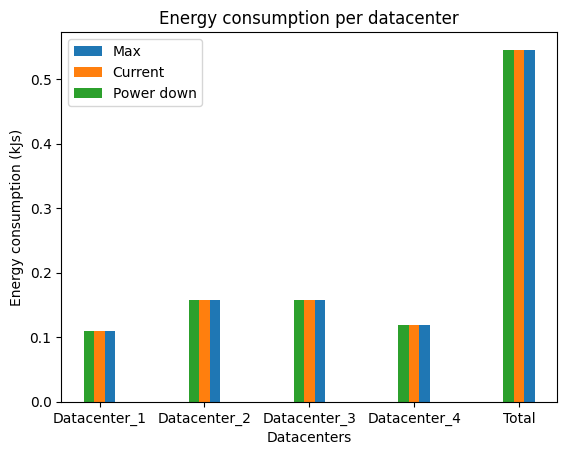

In [13]:
bar_width = 0.1
x = np.arange(len(labels) + 1)
plt.bar(x + bar_width, (np.append(max_power_per_datacenter, np.sum(max_power_per_datacenter)) * 1) / 1000, bar_width, label="Max")
plt.bar(x, (np.append(current_power_per_datacenter, np.sum(current_power_per_datacenter)) * 1) / 1000, bar_width, label="Current")
plt.bar(x - bar_width, (np.append(datacenter_power_per_disk_power_down_disks, np.sum(datacenter_power_per_disk_power_down_disks)) * 1) / 1000, bar_width, label="Power down")
plt.xticks(x, np.append(labels, "Total"))
# plt.figure(figsize=(15,10))
plt.xlabel("Datacenters")
plt.ylabel("Energy consumption (kJs)")
plt.title("Energy consumption per datacenter")
plt.legend()
plt.show()


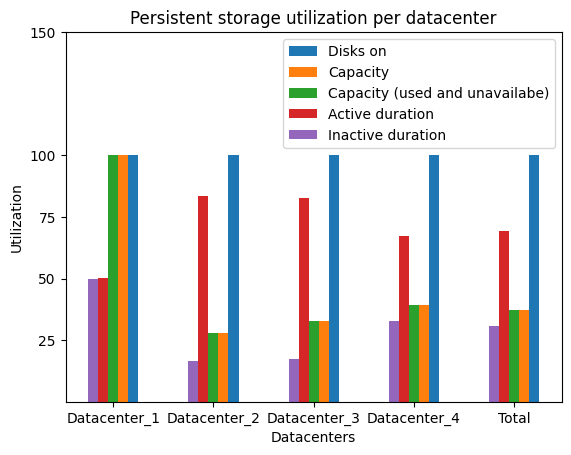

In [14]:
bar_width = 0.1
x = np.arange(len(labels) + 1)
plt.bar(x + bar_width * 2, (np.append(datacenter_power_down_disks_on, np.sum(datacenter_power_down_disks_on)) * 100) / np.append(datacenter_disks, np.sum(datacenter_disks)), bar_width, label="Disks on")
plt.bar(x + bar_width, (np.append(datacenter_power_down_disks_used_capacity, np.sum(datacenter_power_down_disks_used_capacity)) * 100) / np.append(datacenter_total_capacity, np.sum(datacenter_total_capacity)), bar_width, label="Capacity")
plt.bar(x, (np.append(datacenter_power_down_disks_used_or_unavailable_capacity, np.sum(datacenter_power_down_disks_used_or_unavailable_capacity)) * 100) / np.append(datacenter_total_capacity, np.sum(datacenter_total_capacity)), bar_width, label="Capacity (used and unavailabe)")
plt.bar(x - bar_width, (np.append(datacenter_power_down_disks_active_duration, np.sum(datacenter_power_down_disks_active_duration)) * 100) / np.append(datacenter_total_duration, np.sum(datacenter_total_duration)), bar_width, label="Active duration")
plt.bar(x - bar_width * 2, (np.append(datacenter_power_down_disks_inactive_duration, np.sum(datacenter_power_down_disks_inactive_duration)) * 100) / np.append(datacenter_total_duration, np.sum(datacenter_total_duration)), bar_width, label="Inactive duration")
plt.xticks(x, np.append(labels, "Total"))
plt.yticks([25, 50, 75, 100, 150])
plt.xlabel("Datacenters")
plt.ylabel("Utilization")
plt.title("Persistent storage utilization per datacenter")
plt.legend()
plt.show()


### Power consumption over 24 hours

In [15]:
print(f"The maximum power consumption for the cloud provider is {(np.sum(max_power_per_datacenter)*24*60*60)/1000}kW")
print(f"The current power consumption for the cloud provider is {(np.sum(datacenter_power_per_disk_power_down_disks)*24*60*60)/1000}kW")
print(f"The current power consumption each hour for the cloud provider is {(np.sum(datacenter_power_per_disk_power_down_disks)*60*60) / 1000}kWh")
print(f"The cloud provider is saving {(np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(datacenter_power_per_disk_power_down_disks)*24*60*60)/1000}kW")
print(f"The cloud provider is saving per hour {(np.sum(max_power_per_datacenter)*60*60)/1000 - (np.sum(datacenter_power_per_disk_power_down_disks)*60*60)/1000}kWh")
print(f"The cloud provider is thus using {((np.sum(datacenter_power_per_disk_power_down_disks)*24*60*60)/1000 / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% of their full power consumption.")
print(f"The data center is saving {((((np.sum(max_power_per_datacenter)*24*60*60)/1000 - (np.sum(datacenter_power_per_disk_power_down_disks)*24*60*60)/1000)) / (np.sum(max_power_per_datacenter)*24*60*60)/1000) * 100}% power (kWh).")

The maximum power consumption for the cloud provider is 47151.07200000001kW
The current power consumption for the cloud provider is 47151.07200000001kW
The current power consumption each hour for the cloud provider is 1964.6280000000002kWh
The cloud provider is saving 0.0kW
The cloud provider is saving per hour 0.0kWh
The cloud provider is thus using 9.999999999999999e-05% of their full power consumption.
The data center is saving 0.0% power (kWh).


In [16]:
for index in range(len(labels)):
    print(f"---------- {labels[index]} ----------")
    print(f"The maximum power consumption for the data center is {(max_power_per_datacenter[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption for the data center is {(datacenter_power_per_disk_power_down_disks[index]*24*60*60) / 1000}kW")
    print(f"The current power consumption each hour for the cloud provider is {(datacenter_power_per_disk_power_down_disks[index]*60*60) / 1000}kWh")
    print(f"The data center is saving {(max_power_per_datacenter[index]*24*60*60) / 1000 - (datacenter_power_per_disk_power_down_disks[index]*24*60*60) / 1000}kW")
    print(f"The data center is saving per hour {(max_power_per_datacenter[index]*60*60) / 1000 - (datacenter_power_per_disk_power_down_disks[index]*60*60) / 1000}kWh")
    print(f"The data center is thus using {((datacenter_power_per_disk_power_down_disks[index]*24*60*60) / 1000 / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of their full power consumption.")
    print(f"The data center is saving {(((max_power_per_datacenter[index]*24*60*60) / 1000 - (datacenter_power_per_disk_power_down_disks[index]*24*60*60) / 1000) / (max_power_per_datacenter[index]*24*60*60) / 1000) * 100}% of power (kWh).")
    print()


---------- Datacenter_1 ----------
The maximum power consumption for the data center is 9521.279999999999kW
The current power consumption for the data center is 9521.279999999999kW
The current power consumption each hour for the cloud provider is 396.7199999999999kWh
The data center is saving 0.0kW
The data center is saving per hour 0.0kWh
The data center is thus using 9.999999999999999e-05% of their full power consumption.
The data center is saving 0.0% of power (kWh).

---------- Datacenter_2 ----------
The maximum power consumption for the data center is 13632.192kW
The current power consumption for the data center is 13632.192kW
The current power consumption each hour for the cloud provider is 568.008kWh
The data center is saving 0.0kW
The data center is saving per hour 0.0kWh
The data center is thus using 9.999999999999999e-05% of their full power consumption.
The data center is saving 0.0% of power (kWh).

---------- Datacenter_3 ----------
The maximum power consumption for the d